In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
# for creating our model and training it

from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow.keras.models import Sequential
# this gets our neural network as sequential network

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# dropout is a technique used to prevent model from overfitting

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# define path to data
labels = pd.read_csv('/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/Labels/Label_Complete.csv')

In [3]:
img = image.load_img('/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/RawData/adaptor_1/adaptor_1.JPG')
# plt.imshow(img)

In [4]:
# cv2.imread("/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/RawData/adaptor_1/adaptor_1.JPG").shape

In [21]:
train = ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [22]:
train_dataset = train.flow_from_directory('/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/images',
                                         target_size = (227,227)
                                         )

validation_dataset = validation.flow_from_directory('/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/images',
                                         target_size = (227,227)
                                         )

Found 4543 images belonging to 1 classes.
Found 4543 images belonging to 1 classes.


In [23]:
# model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (227,227,3)),
#                                    tf.keras.layers.MaxPool2D(2,2),
#                                    #
#                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
#                                    tf.keras.layers.MaxPool2D(2,2),
#                                    #
#                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
#                                    tf.keras.layers.MaxPool2D(2,2),
#                                    ##
#                                    tf.keras.layers.Flatten(),
#                                    ##
#                                    tf.keras.layers.Dense(64,activation='relu'),
#                                    ##
#                                    tf.keras.layers.Dense(1,activation='sigmoid')
#                                    ])

In [24]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape = (227,227,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
# model.summary()

In [25]:
# # AlexNet

# image_shape = (227, 227, 3)
# model = Sequential()

# model.add(Conv2D(filters=96, input_shape=image_shape, kernel_size=(11,11), strides=(4,4), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))

# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))

# model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# model.add(Flatten())

# model.add(Dense(4096, input_shape=(227*227*3,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))        # dropout to prevent overfitting

# model.add(Dense(4096))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))

# model.add(Dense(1000))         # output layer
# model.add(Activation('softmax'))

In [26]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [28]:
history = model.fit(train_dataset,
                    steps_per_epoch=15,
                    epochs=20,
                    batch_size = 30,
                    validation_data= validation_dataset)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, + len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/20
 6/15 [===========>..................] - ETA: 6s - loss: 3.4939e-07 - accuracy: 1.0000

KeyboardInterrupt: 

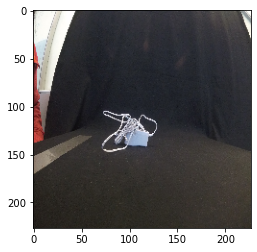

charger


In [56]:
dir_path = '/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/Test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//' + i, target_size = (227,227))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
#     print(val[X])
        
    train_dataset.class_indices